<a href="https://colab.research.google.com/github/manjavacas/Data-Mining/blob/master/notebook/chess_mining_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de partidas de ajedrez mediante Data Mining**

  *Minería de Datos. Curso 2019/2020.*


*   Alberto Velasco Mata
*   Diego Pedregal Hidalgo
*   Rubén Márquez Villalta
*   Antonio Manjavacas


## 1. Preproceso (borrar nulls básicamente)

In [0]:
import os
import pandas as pd

DATA_FILE = os.path.join('.', 'target_data.csv')

df = pd.read_csv(DATA_FILE, index_col=0)

FEATURES = [
    'elo',
    'colour',
    'opening',
    'result',
    'movements',
    'total_time_player',
    'total_time',
    'early_times_mean',
    'early_times_median',
    'early_times_variance',
    'early_times_max',
    'early_times_min',
    'mid_times_mean',
    'mid_times_median',
    'mid_times_variance',
    'mid_times_max',
    'mid_times_min',
    'end_times_mean',
    'end_times_median',
    'end_times_variance',
    'end_times_max',
    'end_times_min',
    'points_balance',
    'taken_balance',
    'aggressiveness'
]

### 1.1 Eliminación de partidas irrelevantes

La primera operación que realizamos al dataset es la de eliminar las partidas que contienen datos nulos. Estos nulos se producen porque las partidas son demasiado cortas (rendición de algún jugador al prinicipio de la partida) y, por lo tanto, no es posible obtener la información que necesitamos para producir la tarjeta de datos.

In [9]:
print("Null values on",len(df[df.isnull().any(axis=1)]),"columns")
df = df.dropna()

print(df.shape)

Null values on 0 columns
(8553, 29)


## 1.2 Eliminación de partidas que contienen tiempos negativos

En *Lichess*, un jugador puede  «regalar» tiempo al contrincante. Esto provoca que algunos de los valores del dataset que registran la información sobre los tiempos de la partida sean negativos.

Debido a que es imposible saber cuánto tiempo le ha regalado, nos vemos obligados a prescindir de estas partidas

In [10]:
NON_NEGATIVE_COLUMNS = [
    'total_time_player',
    'total_time',
    'early_times_mean',
    'early_times_median',
    'early_times_variance',
    'early_times_max',
    'early_times_min',
    'mid_times_mean',
    'mid_times_median',
    'mid_times_variance',
    'mid_times_max',
    'mid_times_min',
    'end_times_mean',
    'end_times_median',
    'end_times_variance',
    'end_times_max',
    'end_times_min'
]

print("Negative times:", len(df[(df[NON_NEGATIVE_COLUMNS] < 0).any(axis=1)]))
df.drop(df[df[df[NON_NEGATIVE_COLUMNS] < 0].any(axis=1)].index, inplace=True)

Negative times: 0


In [11]:
df.dtypes

user_id                  object
game_link                object
elo                       int64
colour                   object
opening                  object
result                    int64
movements                 int64
total_time_player       float64
total_time              float64
early_times_mean        float64
early_times_median      float64
early_times_variance    float64
early_times_max         float64
early_times_min         float64
mid_times_mean          float64
mid_times_median        float64
mid_times_variance      float64
mid_times_max           float64
mid_times_min           float64
end_times_mean          float64
end_times_median        float64
end_times_variance      float64
end_times_max           float64
end_times_min           float64
points_balance            int64
taken_balance             int64
aggressiveness          float64
colour_enc                int64
opening_enc               int64
dtype: object

In [12]:
df['colour'] = df['colour'].astype('category')
df['colour_enc'] = df['colour'].cat.codes
df['opening'] = df['opening'].astype('category')
df['opening_enc'] = df['opening'].cat.codes

print(df.describe())
print(df.dtypes)
print(df.head(10))

               elo       result  ...   colour_enc  opening_enc
count  8553.000000  8553.000000  ...  8553.000000   8553.00000
mean   2083.204022     0.998948  ...     0.500409    531.04174
std     200.194225     0.955205  ...     0.500029    297.14063
min     896.000000     0.000000  ...     0.000000      0.00000
25%    1977.000000     0.000000  ...     0.000000    270.00000
50%    2126.000000     1.000000  ...     1.000000    535.00000
75%    2211.000000     2.000000  ...     1.000000    802.00000
max    2549.000000     2.000000  ...     1.000000   1035.00000

[8 rows x 25 columns]
user_id                   object
game_link                 object
elo                        int64
colour                  category
opening                 category
result                     int64
movements                  int64
total_time_player        float64
total_time               float64
early_times_mean         float64
early_times_median       float64
early_times_variance     float64
early_times_ma

##2. Data normalization

In [0]:
from sklearn import preprocessing

SELECTED_FEATURES = [
    'elo',
    'opening_enc',
    'result',
    'movements',
    'total_time_player',
    'early_times_median',
    'early_times_max',
    'early_times_min',
    'mid_times_median',
    'mid_times_max',
    'mid_times_min',
    'end_times_median',
    'end_times_max',
    'end_times_min',
    'points_balance',
]

scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df[SELECTED_FEATURES])

##3. PCA

In [0]:
X_pca = df_scaled

In [15]:
from sklearn.decomposition import PCA

N_COMPONENTS = 3
estimator = PCA(n_components = N_COMPONENTS)
X_pca = estimator.fit_transform(df_scaled)

print("[ Explained variance ratio ]")
print(estimator.explained_variance_ratio_)
print(sum(estimator.explained_variance_ratio_))

[ Explained variance ratio ]
[0.62322601 0.22088364 0.06225892]
0.9063685719687522


In [16]:
print("[ Relation between PCA components and features ]")
print(pd.DataFrame(np.matrix.transpose(estimator.components_), columns=[f'PC-{i}' for i in range(N_COMPONENTS)], index=SELECTED_FEATURES))

[ Relation between PCA components and features ]
                        PC-0      PC-1      PC-2
elo                -0.110880 -0.006919  0.288907
opening_enc        -0.000983 -0.999766  0.014340
result             -0.989784  0.001753 -0.033313
movements          -0.000406  0.000115  0.443249
total_time_player   0.001063  0.015091  0.730605
early_times_median -0.001556  0.002331  0.090972
early_times_max    -0.000368  0.004323  0.229377
early_times_min    -0.001495  0.000307  0.014759
mid_times_median   -0.001311  0.011402  0.302232
mid_times_max       0.000450  0.003064  0.076533
mid_times_min      -0.005953  0.004159  0.075692
end_times_median    0.001603  0.002938  0.055031
end_times_max       0.003802 -0.000395  0.132851
end_times_min      -0.001926  0.000521  0.010731
points_balance     -0.089260 -0.000120  0.011578


##4. PLOT

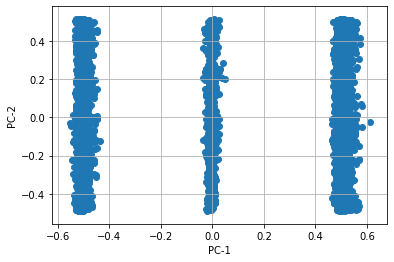

<Figure size 432x288 with 0 Axes>

In [17]:
from matplotlib import pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.grid(True)
plt.show()
plt.tight_layout()

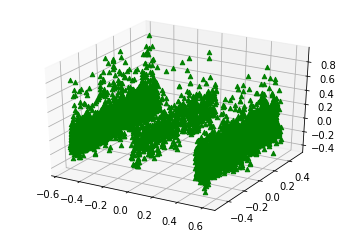

In [18]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Paint the points
for i in range(len(X_pca)):
    ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='g', marker='^')

plt.show()

# rotate the axes and update
#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

In [19]:
import plotly.express as px

scatter = pd.DataFrame(data=X_pca, index=list(range(0, len(df))), columns=['PCA1', 'PCA2', 'PCA3'])
scatter

fig = px.scatter_3d(scatter, x='PCA1', y='PCA2', z='PCA3')
fig.show()

# 5. k-Means

In [0]:
init = 'random'
iterations = 10
max_iter = 300
tol = 1e-04
random_state = 0

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics

#k_range = range(10,36)
k_range = range(2,36)

distortions = []
silhouettes = []

for k in k_range:
    print("k:", k)
    km = KMeans(k, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35


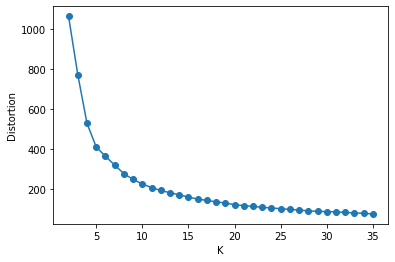

In [22]:
import matplotlib.pyplot as plt

plt.plot(k_range, distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()



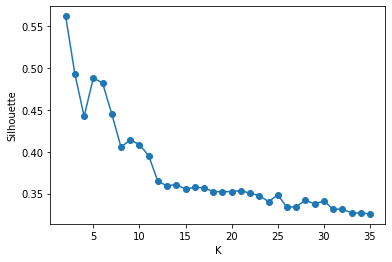

In [23]:
plt.plot(k_range, silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.show()

In [24]:
k = 9

km = KMeans(k, init, n_init = iterations,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

print("Silhouette Coefficient: {:0.3f}".format(metrics.silhouette_score(X_pca, y_km)))
print('Distortion: {:.2f}'.format(km.inertia_))

Silhouette Coefficient: 0.414
Distortion: 247.02


In [0]:
fig, ax = plt.subplots()
# Plot original points with color related to group
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_, s=50)
# Add group color legend
# ax.add_artist(ax.legend(*scatter.legend_elements(alpha=0.8), loc="upper right", title="Groups"))
# Plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', s=50)

plt.title("K-Means (k={k})".format(k=k))
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.grid(True)
plt.show()

In [0]:
df['group'] = km.labels_

In [27]:
import plotly.express as px

scatter = pd.DataFrame(data=X_pca, index=list(range(0, len(df))), columns=['PCA1', 'PCA2', 'PCA3'])
scatter['group'] = km.labels_

fig = px.scatter_3d(scatter, x='PCA1', y='PCA2', z='PCA3', color='group')
fig.show()

In [28]:
pd.set_option('display.max_columns', 999)
print(df.groupby(('group'))['result'].min())
print(df.groupby(('group'))['result'].max())
#print(df.groupby(('group'))['user_id'].unique())

group
0    2
1    2
2    1
3    1
4    2
5    0
6    0
7    0
8    1
Name: result, dtype: int64
group
0    2
1    2
2    1
3    2
4    2
5    0
6    0
7    0
8    1
Name: result, dtype: int64


# 6. GROUPS OF OPENINGS

In [0]:
from sklearn import preprocessing

OPENING_FEATURES = [
    'opening_enc',
    'early_times_mean',
    'early_times_median',
    'early_times_variance',
    'early_times_max',
    'early_times_min',
    'points_balance',
    'aggressiveness'
]

scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df[OPENING_FEATURES])

In [31]:
from sklearn.decomposition import PCA

N_COMPONENTS = 3
estimator = PCA(n_components = N_COMPONENTS)
X_pca = estimator.fit_transform(df_scaled)

print("[ Explained variance ratio ]")
print(estimator.explained_variance_ratio_)
print(sum(estimator.explained_variance_ratio_))

[ Explained variance ratio ]
[0.5888577  0.33458    0.03755978]
0.9609974792510759


In [32]:
print("[ Relation between PCA components and features ]")
print(pd.DataFrame(np.matrix.transpose(estimator.components_), columns=[f'PC-{i}' for i in range(N_COMPONENTS)], index=OPENING_FEATURES))

[ Relation between PCA components and features ]
                          PC-0      PC-1      PC-2
opening_enc           0.982768 -0.184760  0.000211
early_times_mean     -0.002961  0.001157 -0.040208
early_times_median   -0.001944 -0.000576 -0.026919
early_times_variance -0.001019  0.000684 -0.013803
early_times_max      -0.002749  0.006797 -0.048691
early_times_min      -0.000187  0.000151 -0.012208
points_balance       -0.000012 -0.003302 -0.997467
aggressiveness        0.184785  0.982753 -0.002932


In [33]:
import plotly.express as px

scatter = pd.DataFrame(data=X_pca, index=list(range(0, len(df))), columns=['PCA1', 'PCA2', 'PCA3'])
scatter

fig = px.scatter_3d(scatter, x='PCA1', y='PCA2', z='PCA3')
fig.show()

In [0]:
init = 'random'
iterations = 10
max_iter = 300
tol = 1e-04
random_state = 0

In [35]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_range = range(17,47)

distortions = []
silhouettes = []

for k in k_range:
    print("k:", k)
    km = KMeans(k, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46


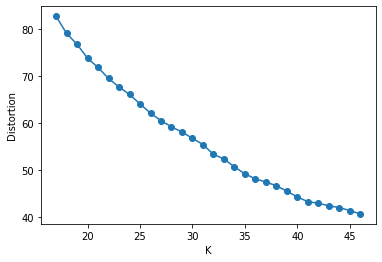

In [36]:
import matplotlib.pyplot as plt

plt.plot(k_range, distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

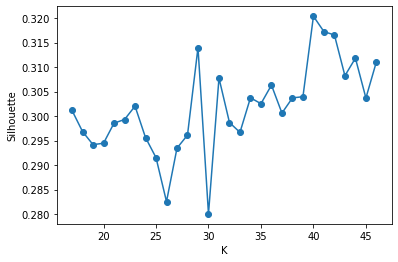

In [37]:
plt.plot(k_range, silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.show()

In [38]:
k = 40

km = KMeans(k, init, n_init = iterations,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

print("Silhouette Coefficient: {:0.3f}".format(metrics.silhouette_score(X_pca, y_km)))
print('Distortion: {:.2f}'.format(km.inertia_))

Silhouette Coefficient: 0.320
Distortion: 44.27


In [39]:
import plotly.express as px

scatter = pd.DataFrame(data=X_pca, index=list(range(0, len(df))), columns=['PCA1', 'PCA2', 'PCA3'])
scatter['group_opening'] = km.labels_

fig = px.scatter_3d(scatter, x='PCA1', y='PCA2', z='PCA3', color='group_opening')
fig.show()